# 3. DBSCAN

In [1]:
from sklearn import datasets
import pandas as pd


In [4]:
#데이터 불러오기
iris = datasets.load_iris()

#데이터 재구성
labels = pd.DataFrame(iris.target)
labels.columns = ['labels']

data = pd.DataFrame(iris.data)
data.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
data = pd.concat([data, labels], axis = 1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
#clustering 하려면 y를 제외하고 DBSCAN진행
feature = data[['Sepal length', 'Sepal width', 'Petal length', 'Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:

#DBSCAN은 sklearn.cluster에 있음

from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#모델 생성
model = DBSCAN(eps = 0.3, min_samples=6)#DBSCAN의 hyperparameter

#적합 & prediction(clustering 진행)
y_predict = pd.DataFrame(model.fit_predict(feature))
y_predict.columns = ['y_predict']

In [19]:
#concatenate labels to df as new column
r = pd.concat([feature,y_predict], axis = 1)
result = pd.DataFrame(r)

result

,Sepal length,Sepal width,Petal length,Petal width,y_predict
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,-1
146,6.3,2.5,5.0,1.9,-1
147,6.5,3.0,5.2,2.0,-1
148,6.2,3.4,5.4,2.3,-1


/Users/jeonghyeonjeong/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/jeonghyeonjeong/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


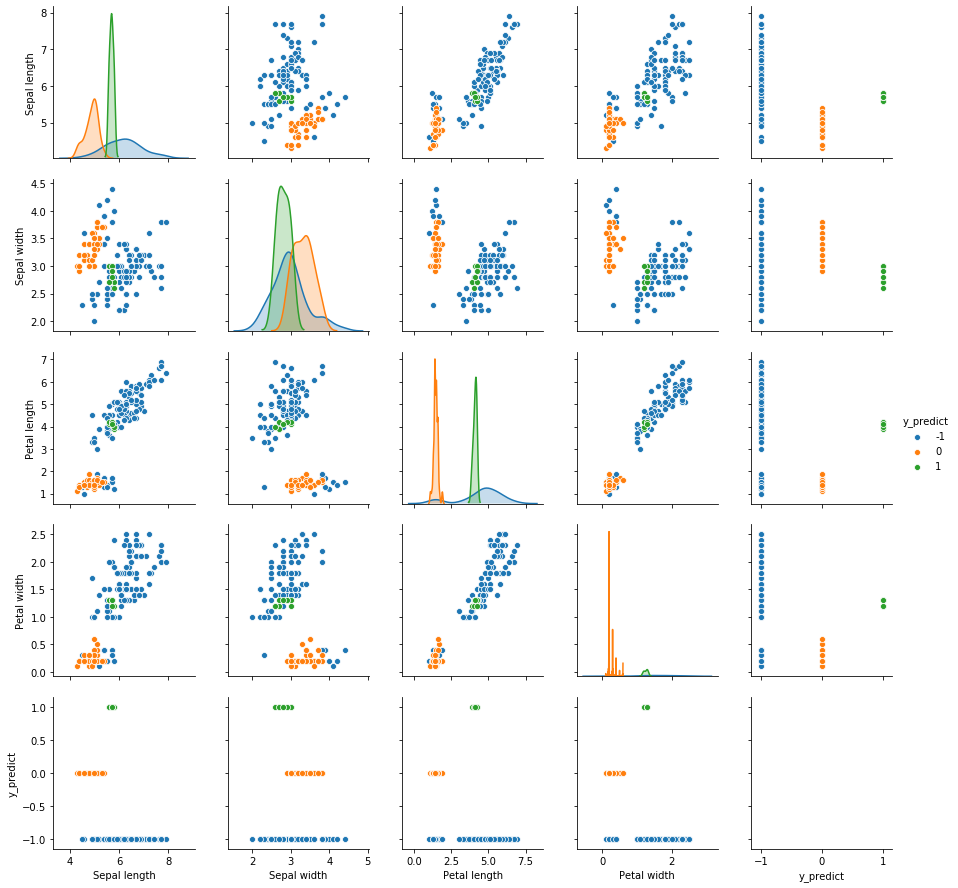

In [21]:
#DBSCAN 결과 시각화
#pairplot with Seaborn

sns.pairplot(r, hue = 'y_predict')
plt.show()

In [23]:
#Kmeans 결과와 비교
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_jobs = 4, random_state = 21)
km.fit(feature)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [57]:
new_labels = pd.DataFrame(km.labels_)
new_labels.columns = ['predict']


In [58]:
r2 = pd.concat([feature, new_labels], axis =1)

/Users/jeonghyeonjeong/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/jeonghyeonjeong/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


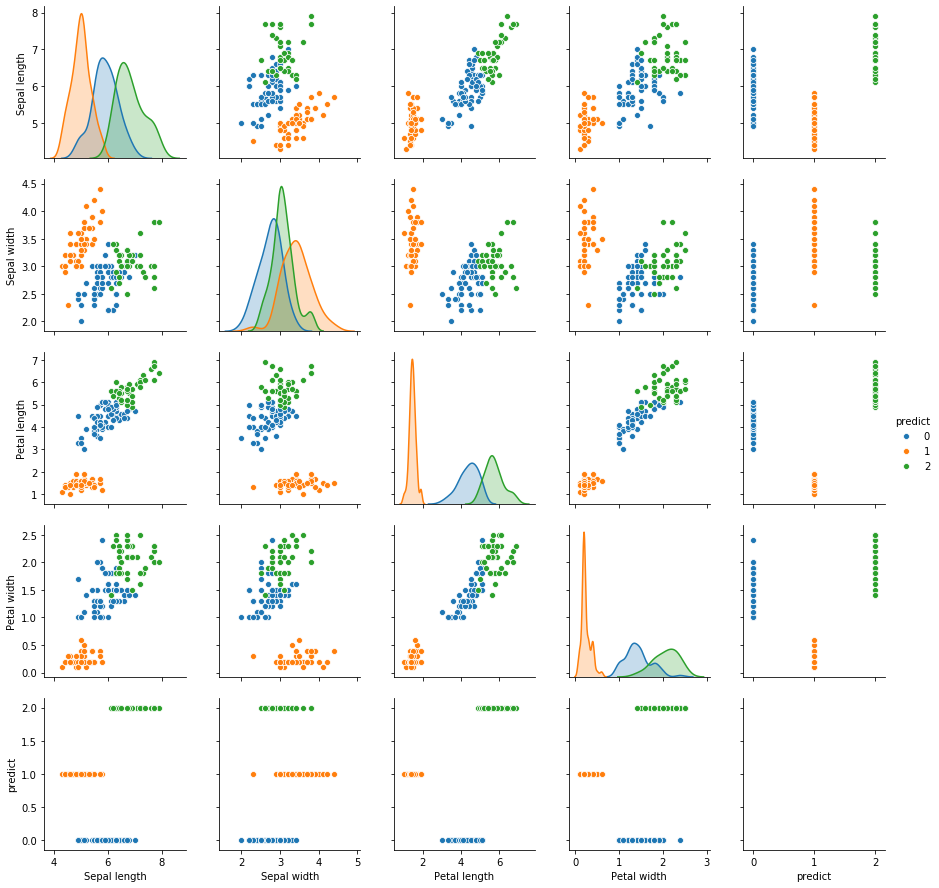

In [59]:
#kMeans 결과 시각화
#pairplot with Seaborn

sns.pairplot(r2, hue = 'predict')
plt.show()

In [64]:
#iris 데이터말고 , 밀집되어 있는 데이터의 경우, 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import os

%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [66]:
data = np.load('/Users/jeonghyeonjeong/for github/머신러닝_데이터분석_dataset/clusterable_data.npy')

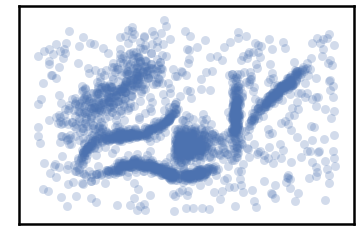

In [67]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [68]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

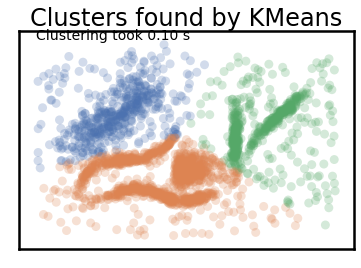

In [69]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':3})

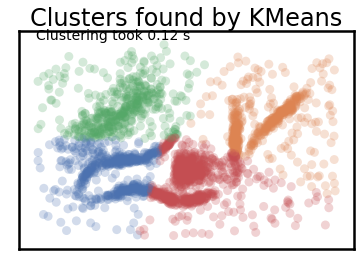

In [70]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4})

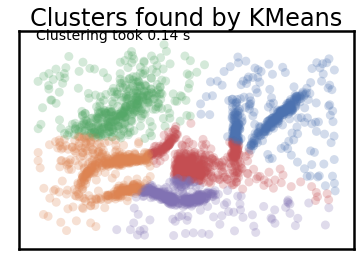

In [71]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':5})

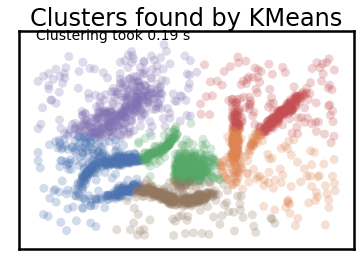

In [72]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

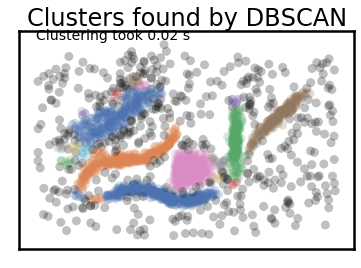

In [73]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.020})

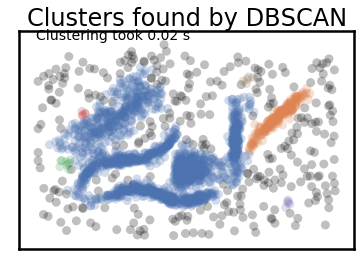

In [74]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.03})

In [75]:
dbs = DBSCAN(eps=0.03)
dbs2=dbs.fit(data)

dbs2.labels_

array([ 0,  0,  0, ..., -1, -1,  0])

## HDBSCAN
DBSCAN의 발전된 버젼, 하이퍼 파라미터에 덜민감함

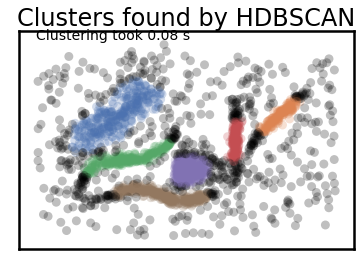

In [79]:



import hdbscan


plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':45})
